In [4]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

<h1>Часть 1. Градиентный спуск (5 баллов)<h1>

In [5]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

<h2>Задание 1.1 (5/8 балла):<h2>

Реализуйте класс MSELoss

Он должен вычислять лосс и градиент по формулам наверху

In [6]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return ((X.dot(w) - y)**2).sum() / y.shape[0]
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return 2*X.T.dot(X.dot(w) - y) / y.shape[0]

Теперь мы можем создать объект MSELoss и при помощи него вычислять значение нашей функции потерь и градиенты:

In [7]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


<h2>Задание 1.2 (5/8 балла):<h2>

Реализуйте функцию gradient_descent

Функция должна принимать на вход начальное значение весов линейной модели w_init, матрицу объектов-признаков X, вектор правильных ответов y, объект функции потерь loss, размер шага lr и количество итераций n_iterations.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из loss посредством вызова метода calc_grad) по формуле выше и возвращать траекторию спуска (список из новых значений весов на каждом шаге)

In [8]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    lst = [w_init]
    for i in range(n_iterations):
        lst.append(lst[-1] - lr*loss.calc_grad(X, y, lst[-1]))
    return lst

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [9]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [10]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [11]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 15))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8)

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

<h2>Задание 1.3 (5/8 балла):<h2>

При помощи функций gradient_descent и plot_gd нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра lr). Используйте не менее четырёх разных значений для lr.

Сделайте и опишите свои выводы о том, как параметр lr влияет на поведение градиентного спуска

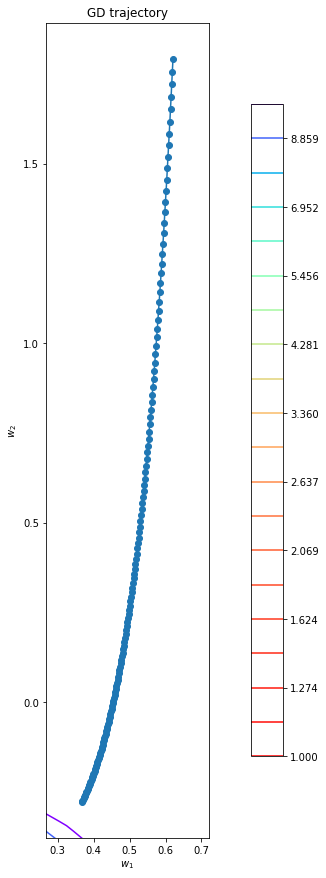

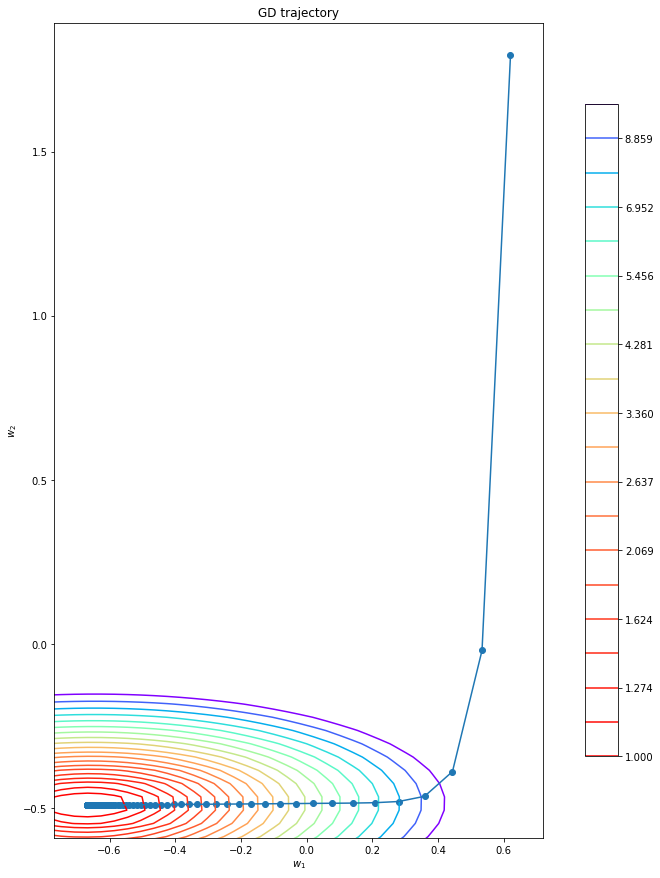

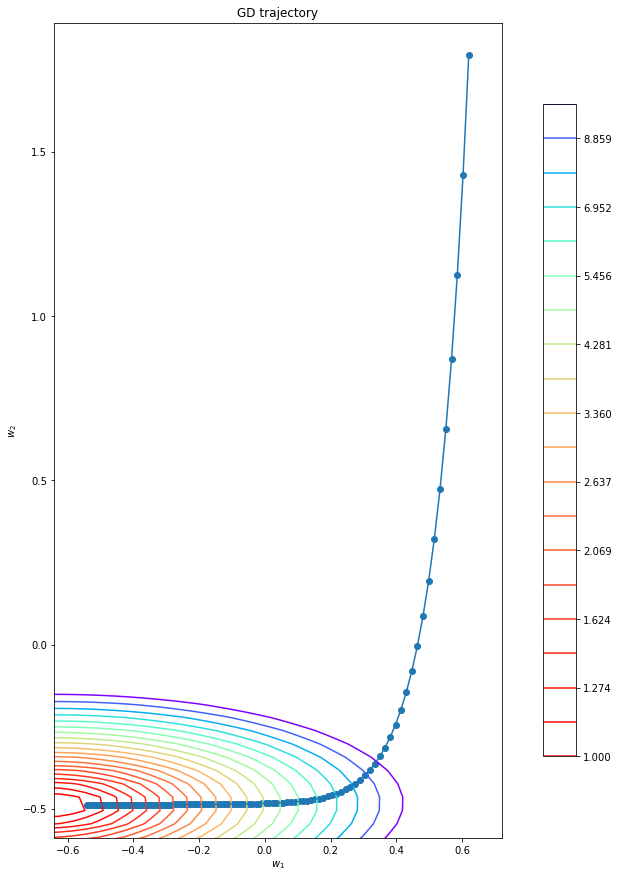

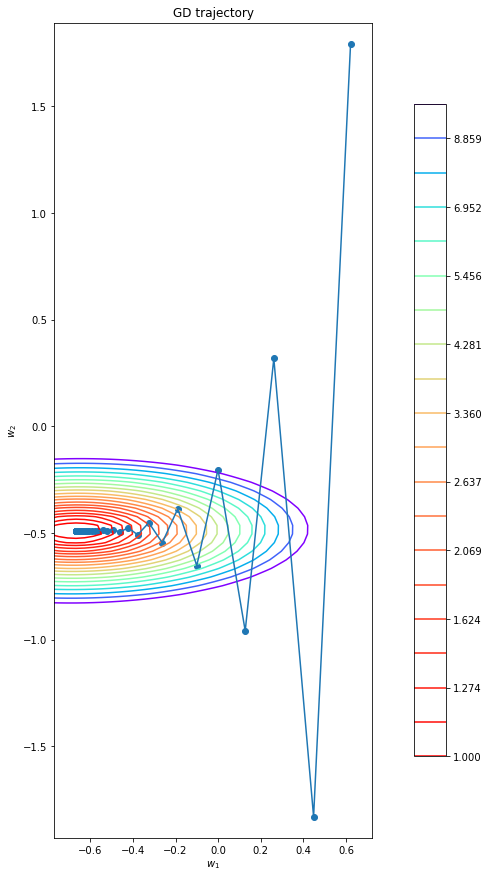

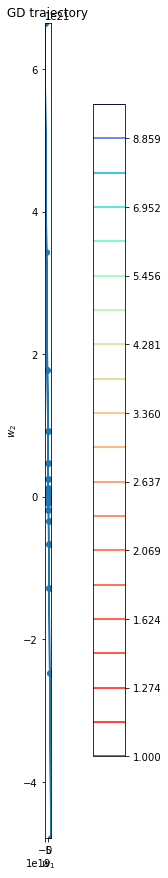

In [12]:
lr_list = [0.0001, 0.005, 0.001, 0.01, 0.015]
for lr_i in lr_list:
    plot_gd(gradient_descent(w_init, X, y, loss, lr_i, 150), X, y, loss)

Как можно заметить, при маленьком lr итераций градиентного спуска может не хватить, для того чтоб дойти до минимума. А при слишком больших lr градиентный спуск может даже расходиться.(последний пример)

Теперь реализуем стохастический градиентный спуск

<h2>Задание 1.4 (5/8 балла):<h2>

Реализуйте функцию stochastic_gradient_descent

Функция должна принимать все те же параметры, что и функция gradient_descent, но ещё параметр batch_size, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке X, а только по случайно выбранной части.

In [13]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    lst = [w_init]
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        y_batch = y[batch_indices]
        lst.append(lst[-1] - lr*loss.calc_grad(batch, y_batch, lst[-1]))
    return lst

<h2>Задание 1.5 (5/8 балла):<h2>

При помощи функций stochastic_gradient_descent и plot_gd нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра lr) и размера подвыборки (параметра batch_size). Используйте не менее четырёх разных значений для lr и batch_size.

Сделайте и опишите свои выводы о том, как параметры lr и batch_size влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

batch: 1 - lr: 0.0001


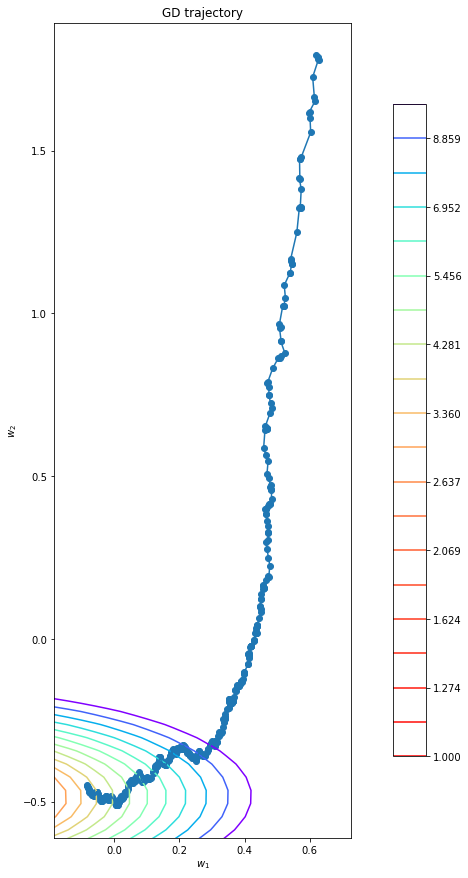

batch: 1 - lr: 0.005


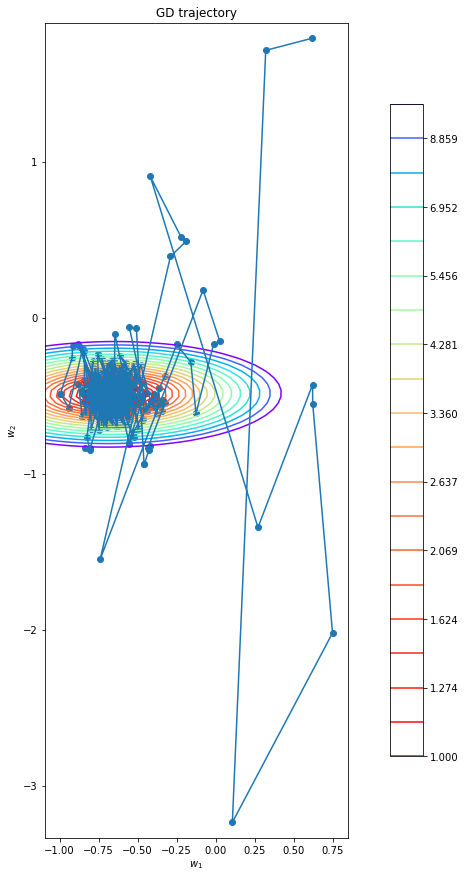

batch: 1 - lr: 0.001


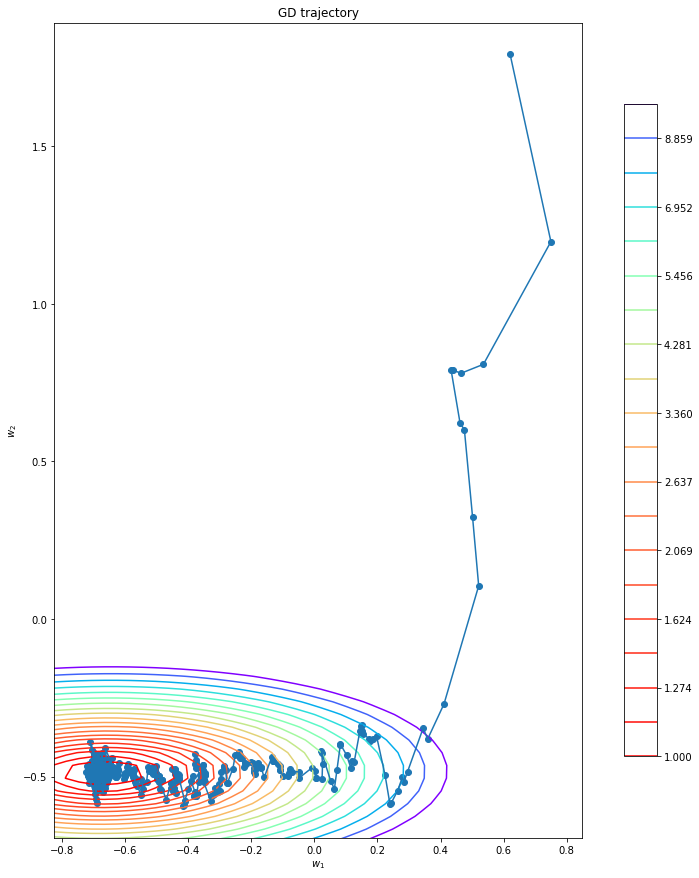

batch: 1 - lr: 0.01


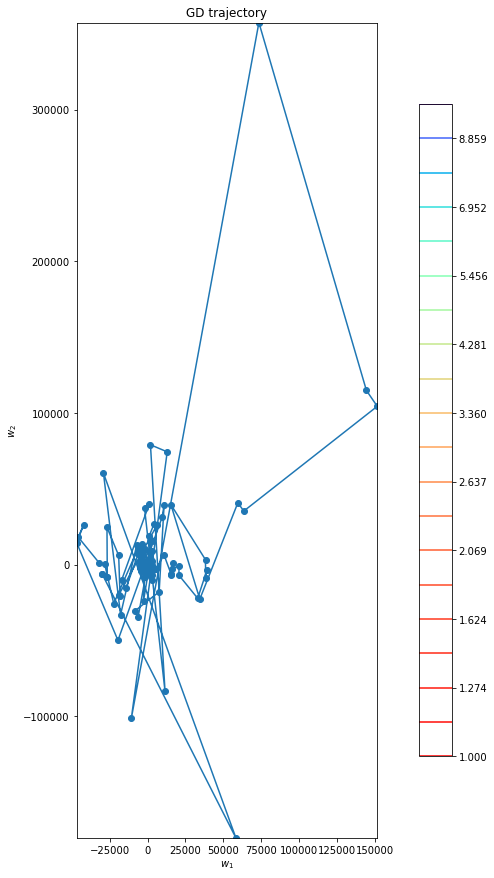

batch: 1 - lr: 0.015


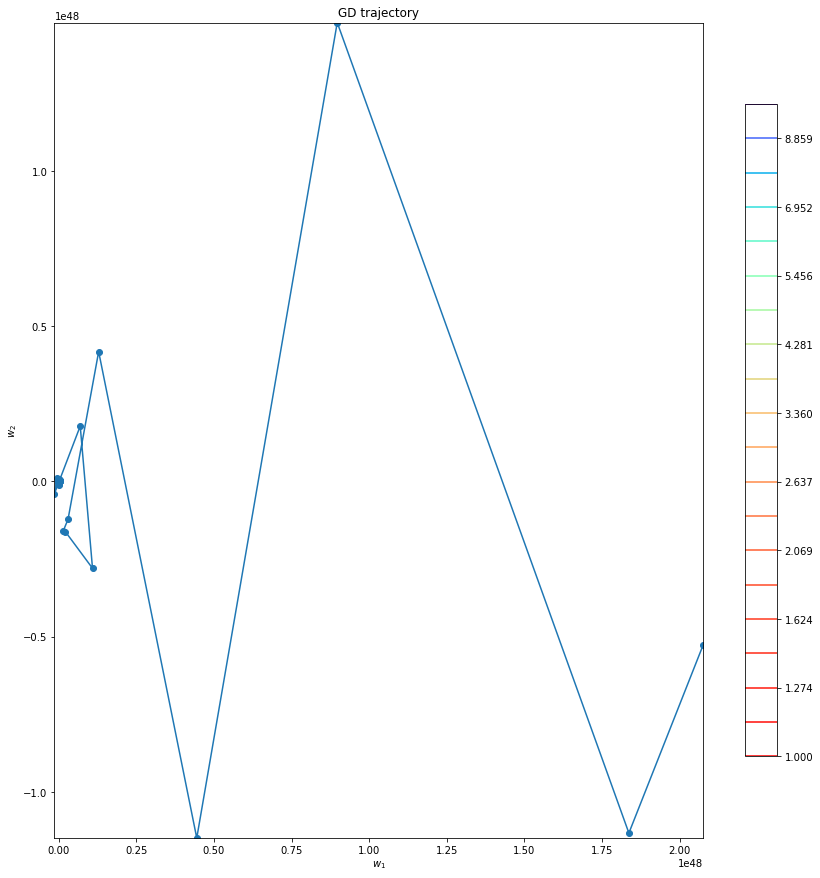

batch: 10 - lr: 0.0001


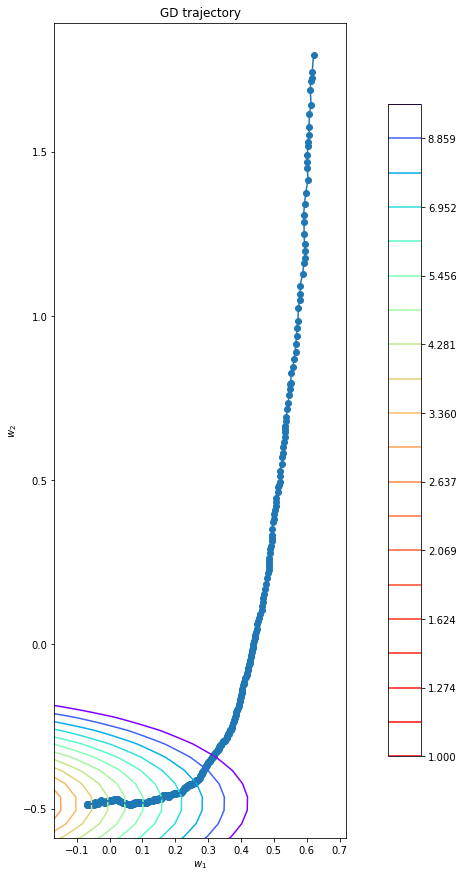

batch: 10 - lr: 0.005


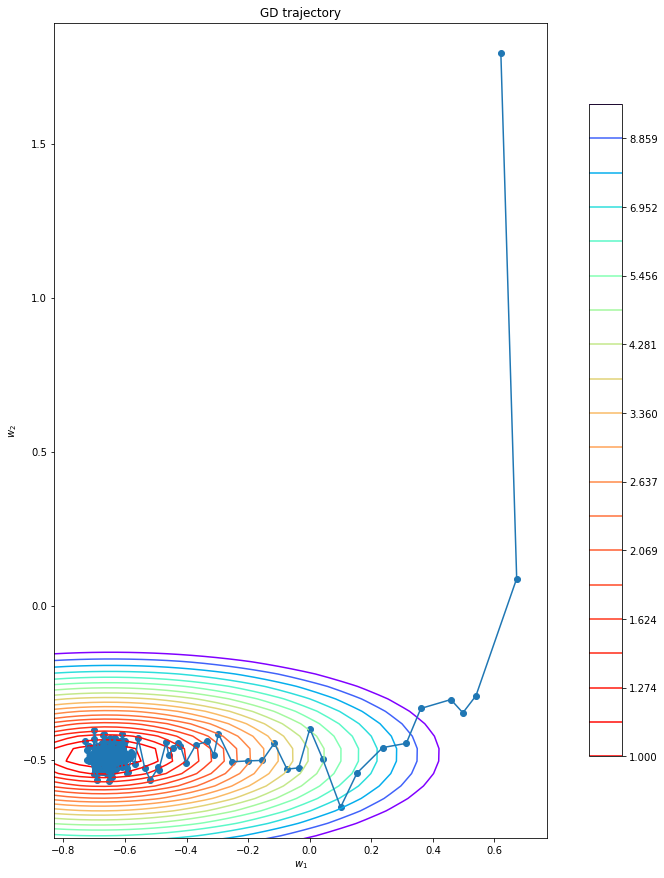

batch: 10 - lr: 0.001


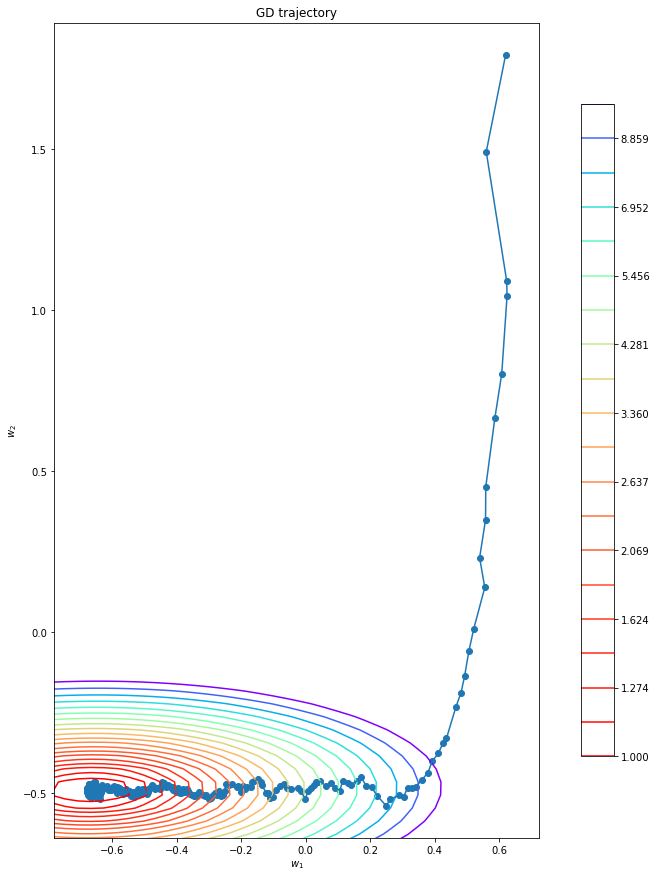

batch: 10 - lr: 0.01


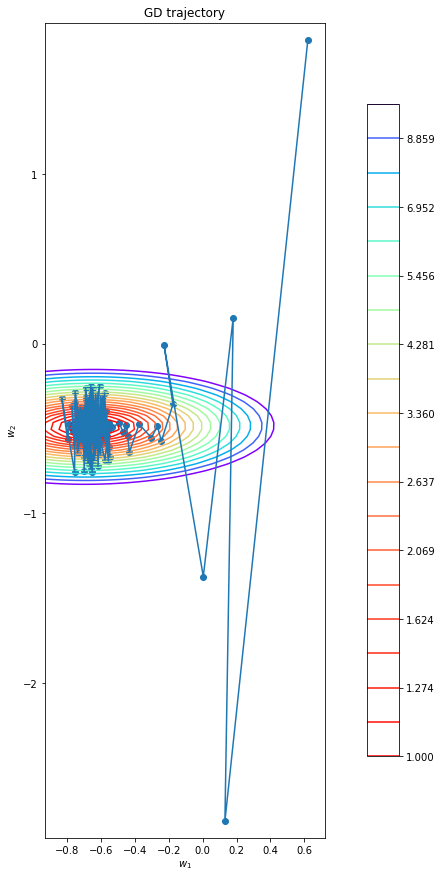

batch: 10 - lr: 0.015


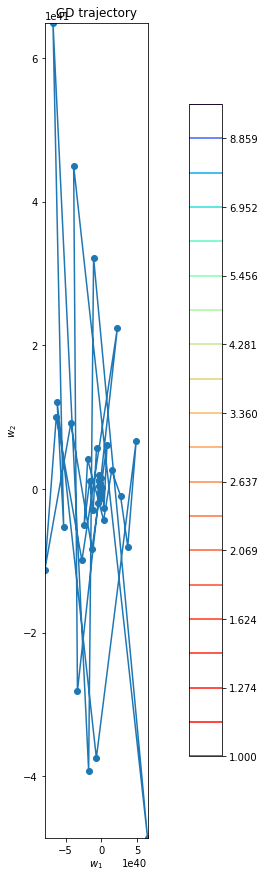

batch: 50 - lr: 0.0001


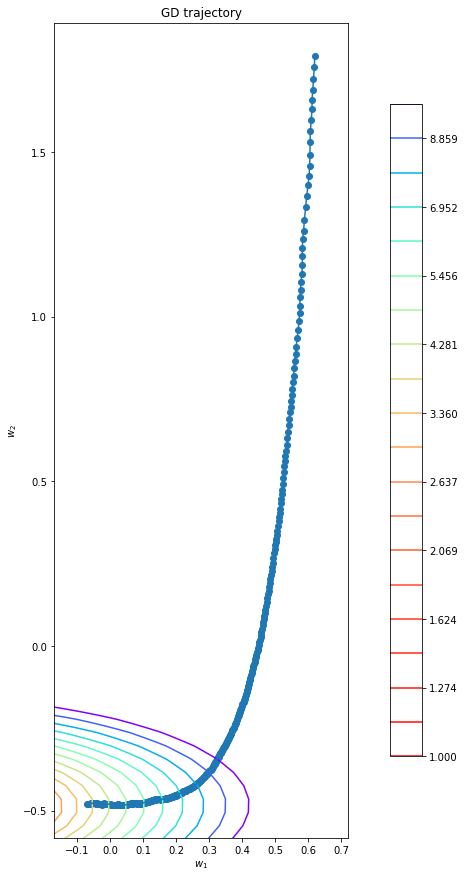

batch: 50 - lr: 0.005


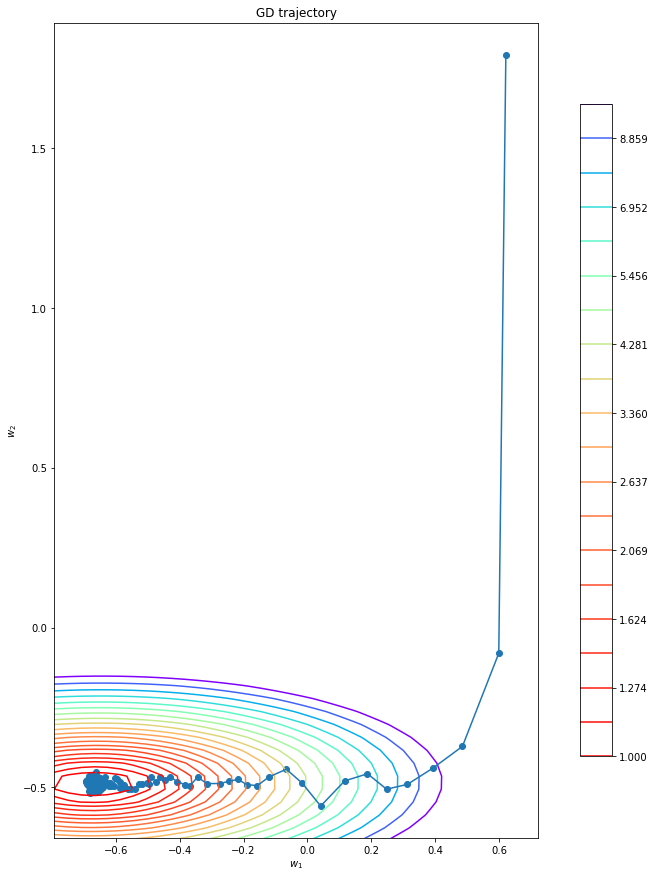

batch: 50 - lr: 0.001


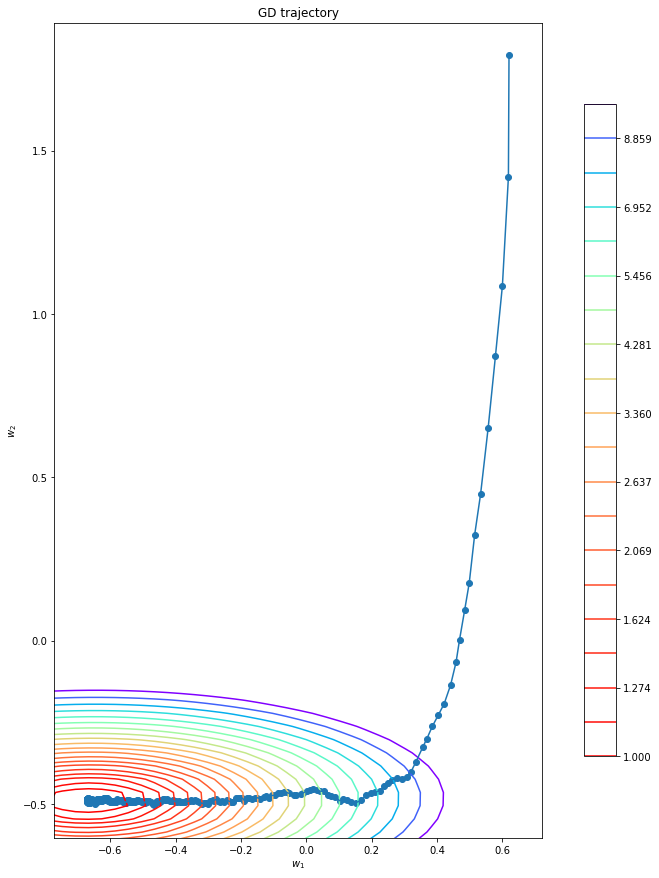

batch: 50 - lr: 0.01


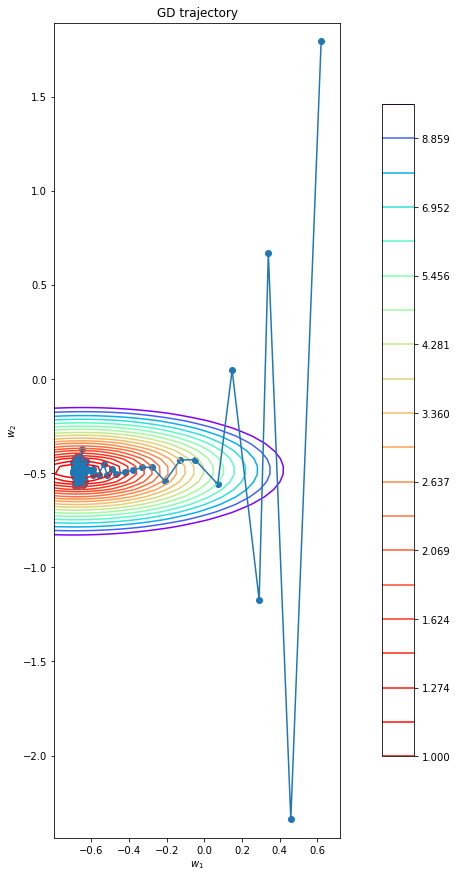

batch: 50 - lr: 0.015


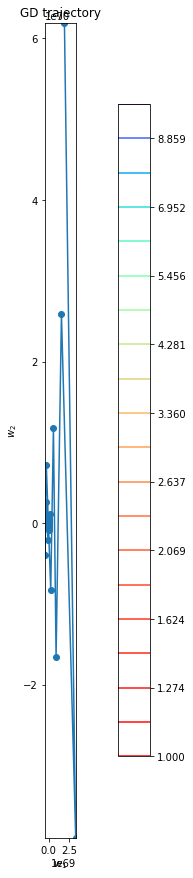

batch: 100 - lr: 0.0001


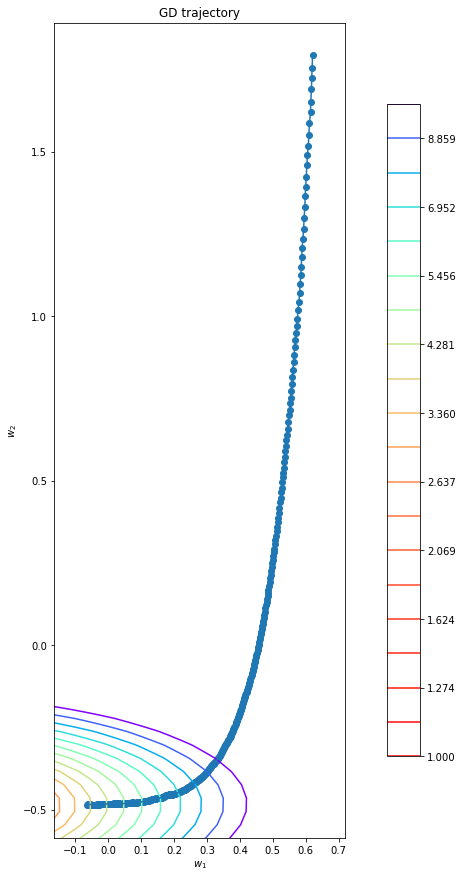

batch: 100 - lr: 0.005


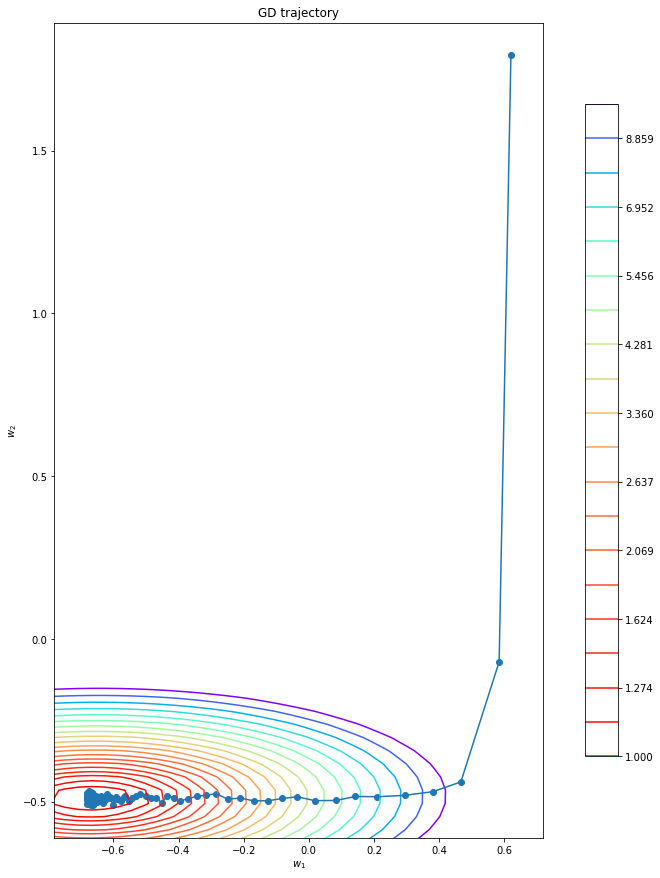

batch: 100 - lr: 0.001


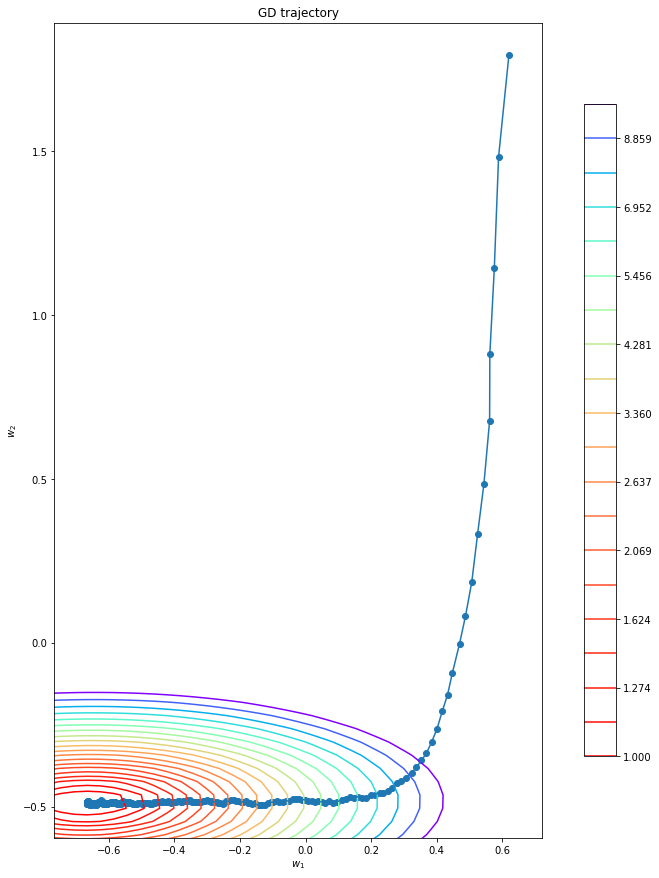

batch: 100 - lr: 0.01


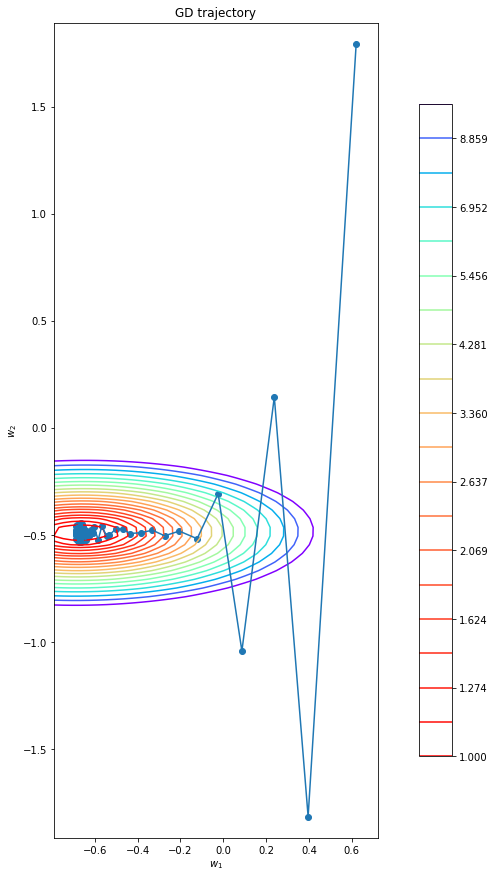

batch: 100 - lr: 0.015


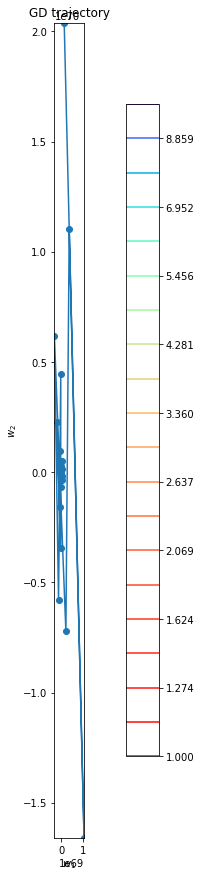

In [14]:
batch_sizes = [1, 10, 50, 100]
lr_list = [0.0001, 0.005, 0.001, 0.01, 0.015]

for batch_i in batch_sizes:
    for lr_i in lr_list:
        print(f'batch: {batch_i} - lr: {lr_i}')
        plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr_i, batch_i, 500), X, y, loss)

При маленьком размере batch и коф. lr стохастический градиентный спуск очень сильно колеблится, при увеличении lr - расходится. Если увеличивать размер batch, то траектория к минимуму становится более плавной.

<h2>Задание 1.6 (5/8 балла):<h2>

Реализуйте функцию stochastic_gradient_descent на этот раз с затухающим шагом по формуле выше. Параметр s0
 возьмите равным 1. Параметр p возьмите из нового аргумента функции p.

In [15]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    lst = [w_init]
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        y_batch = y[batch_indices]
        lst.append(lst[-1] - lr*((1 / (1 + i))**p)*loss.calc_grad(batch, y_batch, lst[-1]))
    return lst

<h2>Задание 1.7 (5/8 балла):<h2>

При помощи новой функции stochastic_gradient_descent и функции plot_gd нарисуйте траекторию градиентного спуска для разных значений параметра p. Используйте не менее четырёх разных значений для p. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1. Параметр lr возьмите равным 0.01, а параметр batch_size равным 10.

Сделайте и опишите свои выводы о том, как параметр p влияет на поведение стохастического градиентного спуска

p =  0.1


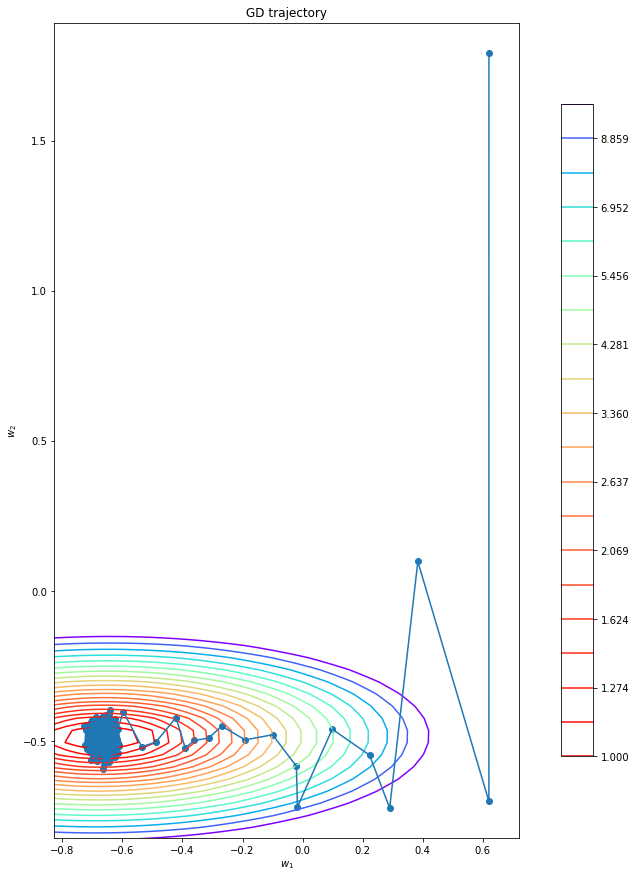

p =  0.3


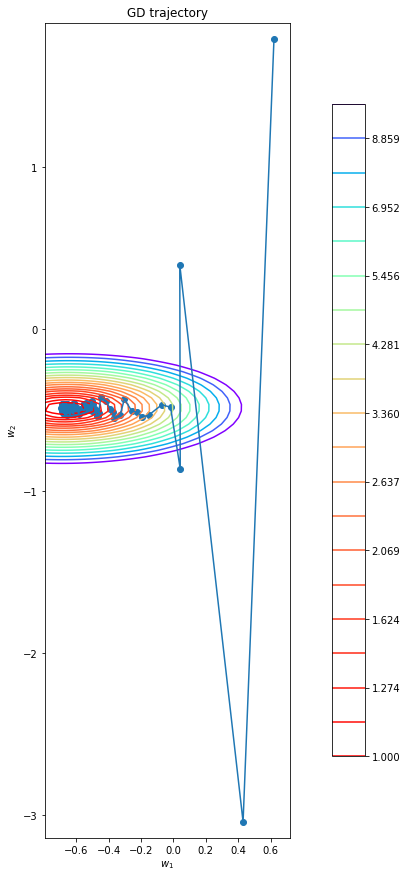

p =  0.5


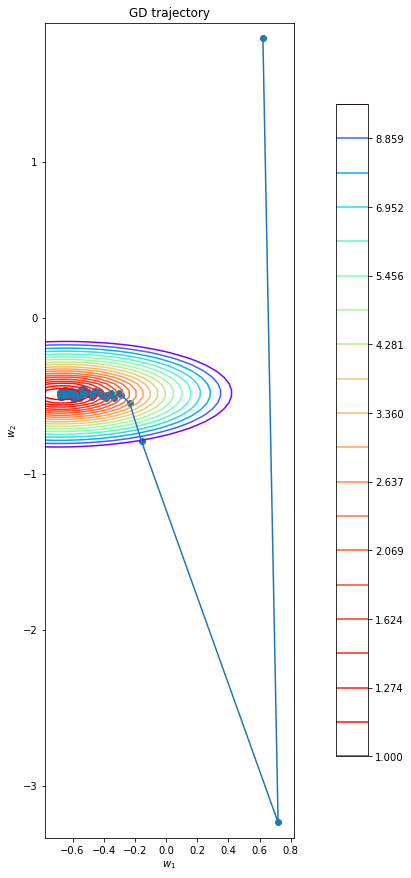

p =  0.7


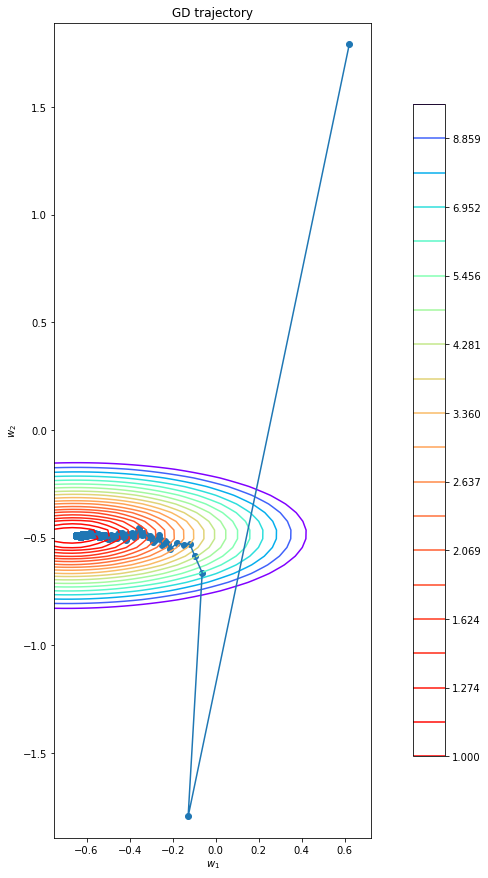

p =  1


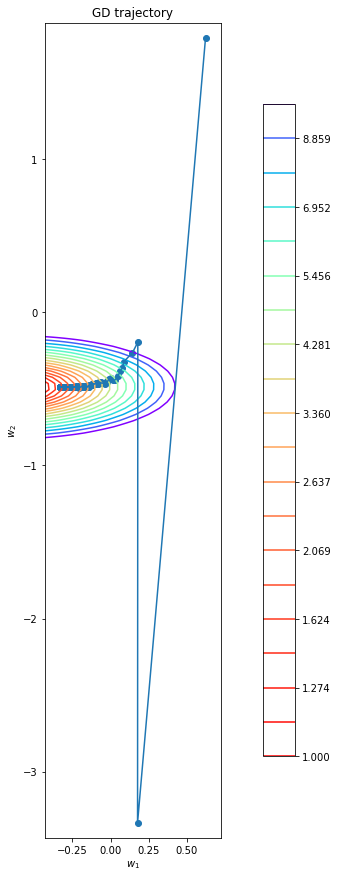

p =  2


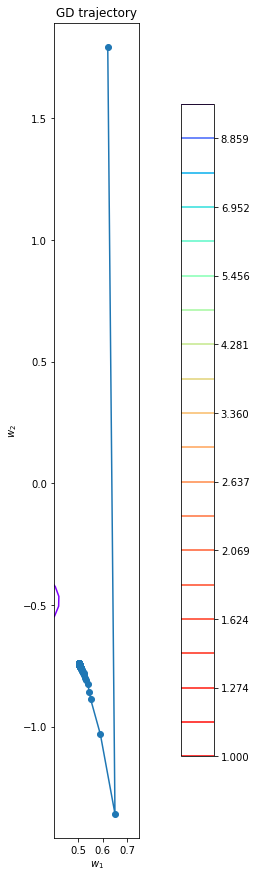

In [16]:
p_list = [0.1, 0.3, 0.5, 0.7, 1, 2]
for p in p_list:
    print('p = ', p)
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 1000), X, y, loss)

При увеличении p шаги уменьшаются быстрее, и SGD может не дойти до минимума

<h2>Задание 1.8 (5/8 балла):<h2>

Сравните сходимость обычного градиентного спуска и стохастичекой версии: Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода calc_loss, используя X и y из датасета и w с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр batch_size возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

In [17]:
y_gd = []
y_sgd = []
lr = 0.01
batch_size = 10
p = 0.7
iters = 20
w_gd = gradient_descent(w_init, X, y, loss, lr, iters)
w_sgd = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, iters)
x = np.arange(iters + 1)
for i in range(iters + 1):
    y_gd.append(loss.calc_loss(X, y, w_gd[i]))
    y_sgd.append(loss.calc_loss(X, y, w_sgd[i]))

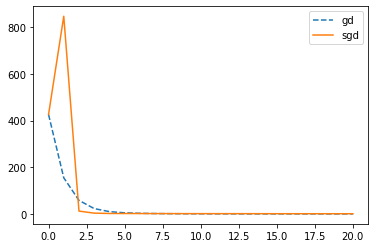

In [18]:
plt.plot(x, y_gd, '--')
plt.plot(x, y_sgd)
plt.legend(['gd', 'sgd'])
plt.show()

На данном графике можно заметить, что sgd и gd сходится примерно за одно и тоже количество итераций. Следовательно, лучше использовать sgd, так как он тратит меньше времени на одну итерацию. Это произошло из-за маленького размера выборки.

<h1>Часть 2. Линейная регрессия (5 баллов)<h1>

<h2>Задание 2.1 (5/8 балла):<h2>

Допишите код в методах fit и predict класса LinearRegression

В методе fit вам нужно как-то инициализировать веса w, применить gradient_descent и сохранить последнюю w из траектории.

В методе predict вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в self.loss. Его нужно использовать в fit для gradient_descent.

In [19]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        self.w = stochastic_gradient_descent(np.random.uniform(-2, 2, (X.shape[1])), X, y, self.loss, self.lr, 10, 0.7, 1000)[-1]
        
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X.dot(self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр loss при инициализации.

Пока у нас нет никаких классов кроме MSELoss, но скоро они появятся.

Для MSELoss мы бы создавали наш объект линейной регрессии, например, так:

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр loss при инициализации.

Пока у нас нет никаких классов кроме MSELoss, но скоро они появятся.

Для MSELoss мы бы создавали наш объект линейной регрессии, например, так:

In [20]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [21]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [22]:
y1 = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

<h2>Задание 2.2 (5/8 балла):<h2>

Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

- Разделите датасет на обучающую и тестовую выборку
- Заполните пропуски
- Нормализуйте числовые признаки
- Закодируйте категориальные переменные

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [24]:
print('Наличие пропусков до обработки:', X_raw.isna().any().any())

Наличие пропусков до обработки: True


In [25]:
#заполняем пропуски
cat_features_mask = (X_raw.dtypes == "object").values

# для вещественнозначных признаков заполним пропуски средними
X_real = X_raw[X_raw.columns[~cat_features_mask]]
mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns)

# для категориальных - пустыми строками
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)

X_no_mis.head()

,index,0,1,9,10,11,12,13,16,18,...,2,3,4,5,6,7,8,14,15,17
0,0.0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,1.0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,2.0,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,...,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,3.0,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,...,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,4.0,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,...,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [26]:
print('Наличие пропусков после обработки:', X_no_mis.isna().any().any())

Наличие пропусков после обработки: False


In [27]:
X_dum = pd.get_dummies(X_no_mis, drop_first=True)
X_dum.head()

,index,0,1,9,10,11,12,13,16,18,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,0.0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,...,0,0,0,0,0,0,0,1,0,0
1,1.0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,...,0,0,0,0,0,0,0,1,0,0
2,2.0,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,...,0,0,0,0,0,0,0,1,0,0
3,3.0,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,...,0,0,0,0,0,0,0,1,0,0
4,4.0,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,...,0,0,0,0,0,0,0,1,0,0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y1, test_size=0.2, random_state=10)

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

<h2>Задание 2.3 (5/8 балла):<h2>

Обучите написанную вами линейную регрессию на обучающей выборке

In [30]:
linear_regression.fit(X_train_scal, y_train)

<h2>Задание 2.4 (5/8 балла):<h2>

Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода mean_squared_error из sklearn.metrics.

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
print('MSE Train = ', mean_squared_error(linear_regression.predict(X_train_scal), y_train))
print('MSE Test = ', mean_squared_error(linear_regression.predict(X_test_scal), y_test))

MSE Train =  3133995.5721721146
MSE Test =  7290392.085928228


<h2>Задание 2.5 (5/8 балла):<h2> 

Реализуйте класс MSEL2Loss

In [33]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return ((X.dot(w) - y)**2).sum() / y.shape[0] + self.coef*((w[:-1]**2).sum())
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        w_cpy = w.copy()
        w_cpy[-1] = 0
        return 2*X.T.dot(X.dot(w) - y) / y.shape[0] + 2*self.coef*w_cpy

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [34]:
linear_regression = LinearRegression(MSEL2Loss(0.02))

<h2>Задание 2.6 (5/8 балла):<h2>

Обучите регрессию с лоссом MSEL2Loss. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [35]:
linear_regression.fit(X_train_scal, y_train)

In [36]:
print('MSEL2 Train = ', linear_regression.loss.calc_loss(np.hstack([X_train_scal, np.ones([X_train_scal.shape[0], 1])]),
                                                         y_train,
                                                         linear_regression.w))
print('MSEL2 Test = ', linear_regression.loss.calc_loss(np.hstack([X_test_scal, np.ones([X_test_scal.shape[0], 1])]),
                                                         y_test,
                                                         linear_regression.w))
print('MSE L2 Train = ', mean_squared_error(linear_regression.predict(X_train_scal), y_train))
print('MSE L2 Test = ', mean_squared_error(linear_regression.predict(X_test_scal), y_test))

MSEL2 Train =  3659253.147692618
MSEL2 Test =  5396357.804918401
MSE L2 Train =  3352335.5275690043
MSE L2 Test =  5089440.184794787


Благодаря регуляризации разница ошибок на тестовой и тренеровочной выборках сократилась. А это является показателем того, что переобучение уменьшилось

<h2>Задание 2.7 (5/8 балла)<h2>

Реализуйте класс HuberLoss

In [54]:
def fi(z: np.ndarray, eps) -> np.ndarray:
    arr = z.copy()
    mask = (arr < eps) & (-eps < arr)
    arr[mask] = 0.5*(arr[mask]**2)
    arr[~mask] = eps*(np.abs(arr[~mask]) - 0.5*eps)
    return arr
    
def g_fi(z: np.ndarray, eps) -> np.ndarray:
    arr = z.copy()
    mask = (arr < eps) & (-eps < arr)
    arr[~mask] = eps*np.sign(arr[~mask])
    return arr

class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        return fi(X.dot(w) - y, self.eps).sum() / y.shape[0]
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return X.T.dot(g_fi(X.dot(w) - y, self.eps)) / y.shape[0]

<h2>Задание 2.8 (5/8 балла):<h2>

Обучите регрессию с лоссом HuberLoss. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c MSELoss.

In [55]:
linear_regression = LinearRegression(HuberLoss(10))

In [56]:
linear_regression.fit(X_train_scal, y_train)

In [40]:
print('Huber Train = ', linear_regression.loss.calc_loss(np.hstack([X_train_scal, np.ones([X_train_scal.shape[0], 1])]),
                                                         y_train,
                                                         linear_regression.w))
print('Huber Test = ', linear_regression.loss.calc_loss(np.hstack([X_test_scal, np.ones([X_test_scal.shape[0], 1])]),
                                                         y_test,
                                                         linear_regression.w))
print('MSE Huber Train = ', mean_squared_error(linear_regression.predict(X_train_scal), y_train))
print('MSE Huber Test = ', mean_squared_error(linear_regression.predict(X_test_scal), y_test))

Huber Train =  133209.63459931174
Huber Test =  126248.23685094701
MSE Huber Train =  244878139.32536784
MSE Huber Test =  204535578.51847103


Как можно заметить ошибки при использовании метрики качества MSE очень большие, это говорит о том, что в наших данных скореевсего много выбросов.

<h1>БОНУС (2.5 баллов)<h1>

<h2>Задание (2.5 баллов):<h2>

Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

In [39]:
def annealing_alg(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, q0: float, n_iterations: int = 100000):
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    lst = [w_init]
    for i in range(1, n_iterations + 1):
        q = q0 / np.log(1 + i)
        new_w = lst[-1] + q*np.random.standard_t(3, size=lst[-1].shape)
        delta_F = loss.calc_loss(X, y, new_w) - loss.calc_loss(X, y, lst[-1])
        if delta_F <= 0:
            lst.append(new_w)
        elif np.random.binomial(1, np.exp(-delta_F/q)):
            lst.append(new_w)
    return lst

In [40]:
w_list = annealing_alg(w_init, X, y, loss, 50, 8000)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
20.824329159376386


In [41]:
def plot_annealing(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 15))
    plt.title("Annealing trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8)

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

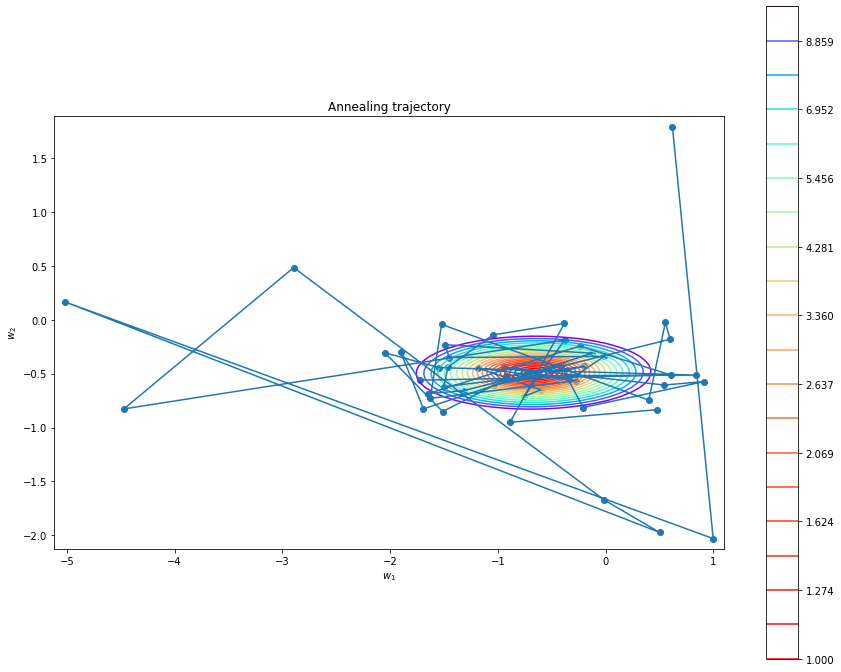

In [42]:
plot_annealing(w_list, X, y, loss)

Как можно заметить алгоритм имитации отжига не плавно идёт к минимуму, а резко скачет между точками. Финальный loss оказался чуть больше, чем при градиентном спуске.